### Exercise: temperature and weather data
Task 1: Swiss Temperature Data
In this exercise you will use Swiss temperature data which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to apply on real data some of the methods presented so far in this subject.

From the Resource tab you can download the exercise notebook, the solution notebook and the 10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt data.

├── c2_exercise_temperature.ipynb
├── c2_solution_temperature.ipynb
└── c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt

Task 2: Szeged Weather Data
In this exercise, you will investigate daily temperature data from Szeged in Hungary between the years of 2006 and 2016.

From the Resource tab you can download the solution notebook and the weatherHistory.csv data. The original data can be found on here on kaggle website.

├── c2_solution_weather.ipynb
└── c2_weatherHistory.csv

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn

data = pd.read_csv("c2_weatherHistory.csv", index_col="Date", parse_dates=True)
data = data.sort_index()  # Make sure that the entries are sorted
data.head()


,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Date,,,,,,
2006-01-01 00:00:00,Partly Cloudy,0.577778,0.89,17.1143,140,9.9820
2006-01-01 01:00:00,Mostly Cloudy,1.161111,0.85,16.6152,139,9.9015
2006-01-01 02:00:00,Mostly Cloudy,1.666667,0.82,20.2538,140,9.9015
2006-01-01 03:00:00,Overcast,1.711111,0.82,14.4900,140,9.9015
2006-01-01 04:00:00,Mostly Cloudy,1.183333,0.86,13.9426,134,9.9015


In [13]:
data = data["Temperature (C)"]
data=data.loc["2006":"2009"]
# Print the shape of the dataframe
print("Data shape: {}\n".format(data.shape))
data.head(5)

Data shape: (35064,)



Date
2006-01-01 00:00:00    0.577778
2006-01-01 01:00:00    1.161111
2006-01-01 02:00:00    1.666667
2006-01-01 03:00:00    1.711111
2006-01-01 04:00:00    1.183333
Name: Temperature (C), dtype: float64

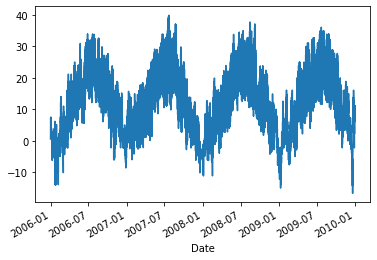

In [14]:
data.plot()
plt.show()

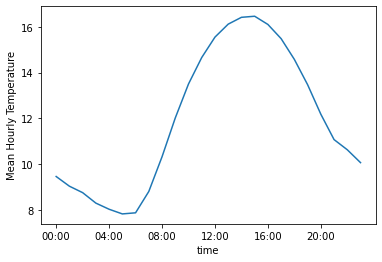

In [15]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)
plt.ylabel("Mean Hourly Temperature")
plt.show()

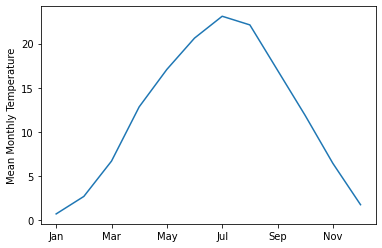

In [16]:
by_month = data.groupby(data.index.month).mean()
by_month.index = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
monthly_ticks = 2 * np.arange(6)
plt.ylabel("Mean Monthly Temperature")
by_month.plot(xticks=monthly_ticks)
plt.show()

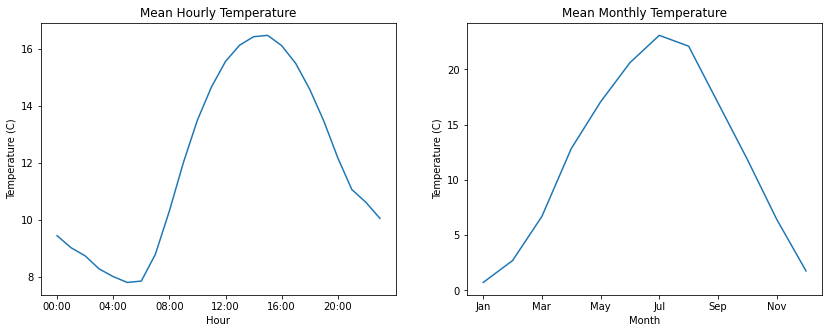

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.plot(ax=ax[0], title='Mean Hourly Temperature', xticks=hourly_ticks)
by_month.plot(ax=ax[1], title='Mean Monthly Temperature', xticks=monthly_ticks)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature (C)')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Hour')
plt.show()